# Research Thesis 1st, 3rd Harmonics

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [42]:
harmonicOneThree = pd.read_csv("100_1_3.csv")
harmonicOneThree.head()

,Time_1,Voltage_1,Voltage_2
0,0.00000,6.0,4.0
1,0.00005,-4.0,-4.0
2,0.00010,2.0,0.0
3,0.00015,-8.0,-10.0
4,0.00020,-4.0,-6.0


In [43]:
harmonicOneThree.info

<bound method DataFrame.info of        Time_1  Voltage_1  Voltage_2
0     0.00000        6.0        4.0
1     0.00005       -4.0       -4.0
2     0.00010        2.0        0.0
3     0.00015       -8.0      -10.0
4     0.00020       -4.0       -6.0
...       ...        ...        ...
1195  0.05980        8.0       10.0
1196  0.05980       14.0       16.0
1197  0.05990        4.0        6.0
1198  0.05990       10.0       12.0
1199  0.06000        0.0        2.0

[1200 rows x 3 columns]>

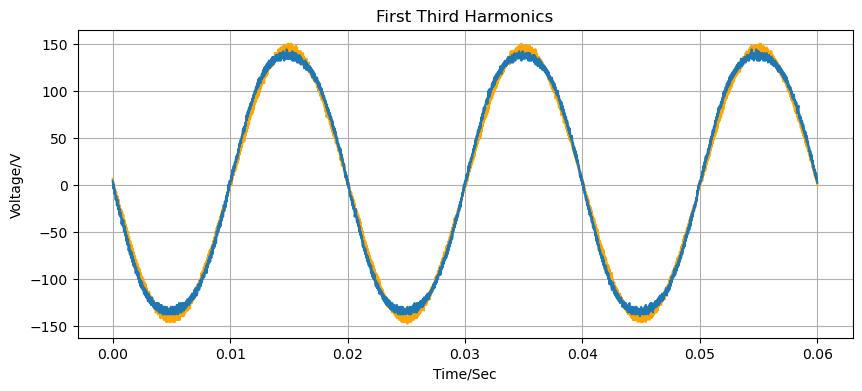

In [44]:
Time = harmonicOneThree['Time_1']
Voltage_1 = harmonicOneThree['Voltage_1']
Voltage_2 = harmonicOneThree['Voltage_2']
plt.figure(figsize=(10,4))
plt.plot(Time, Voltage_1, color='orange')
plt.plot(Time, Voltage_2)
plt.xlabel('Time/Sec')
plt.ylabel('Voltage/V')
plt.title('First Third Harmonics') 
plt.grid(True)
plt.show()

In [45]:
# Assuming you have a "Voltage_1" column indicating the class (0 for non-harmonic, 1 for harmonic)
X = harmonicOneThree.drop("Voltage_1", axis=1)
y = harmonicOneThree["Voltage_2"]

In [55]:
X

,Time_1,Voltage_2
0,0.00000,4.0
1,0.00005,-4.0
2,0.00010,0.0
3,0.00015,-10.0
4,0.00020,-6.0
...,...,...
1195,0.05980,10.0
1196,0.05980,16.0
1197,0.05990,6.0
1198,0.05990,12.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.9791666666666666


In [48]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_knn = KNeighborsClassifier(n_neighbors=3)
pca_knn.fit(X_train_pca, y_train)
pca_accuracy = pca_knn.score(X_test_pca, y_test)
print("PCA + KNN Accuracy:", pca_accuracy)

PCA + KNN Accuracy: 0.9791666666666666


In [49]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_accuracy = decision_tree.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9958333333333333


In [50]:
svm = SVC()
svm.fit(X_train, y_train)
svm_accuracy = svm.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.14583333333333334


In [51]:
# Split the dataset into training and testing subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a range of hyperparameter values to vary (e.g., max_depth for Decision Tree)
# param_range = np.arange(1, 21)

# # Compute training and validation scores for different max_depth values
# train_scores, valid_scores = validation_curve(
#     DecisionTreeClassifier(random_state=42), X, y, param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy"
# )

# # Calculate mean and standard deviation of scores for each max_depth value
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# valid_mean = np.mean(valid_scores, axis=1)
# valid_std = np.std(valid_scores, axis=1)

# # Plot the validation curves
# plt.figure(figsize=(10, 6))
# plt.title("Validation Curve with Decision Tree")
# plt.xlabel("Max Depth")
# plt.ylabel("Accuracy")
# plt.semilogx(param_range, train_mean, label="Training Score", color="b")
# plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="b")
# plt.semilogx(param_range, valid_mean, label="Validation Score", color="g")
# plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color="g")
# plt.legend(loc="best")
# plt.grid()
# plt.show()

Correlation Matrix:
             Time_1  Voltage_1  Voltage_2
Time_1     1.000000   0.259393   0.263240
Voltage_1  0.259393   1.000000   0.997879
Voltage_2  0.263240   0.997879   1.000000


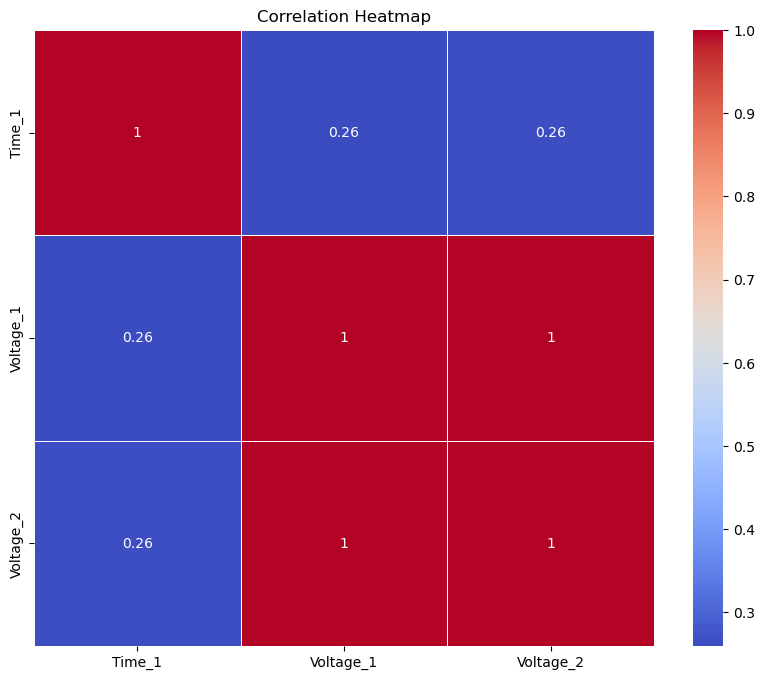

In [52]:
# Calculate the correlation matrix
correlation_matrix = harmonicOneThree.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()